## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [4]:
show(DF_raw_paintings)

In [6]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats liek we did in the lecture!

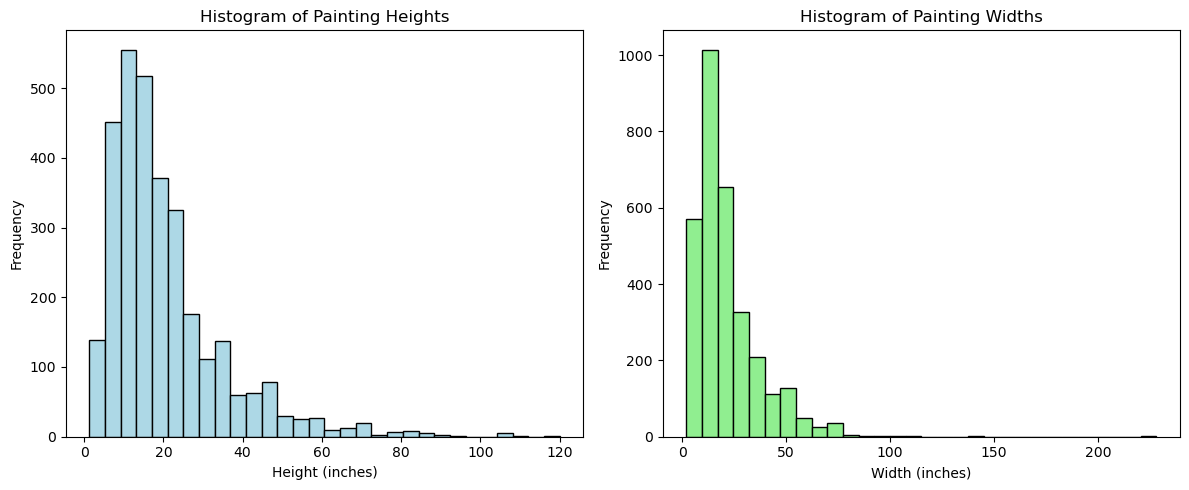

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location, na_filter=False)

# Replace empty strings with NaN
DF_raw_paintings['Height_in'] = DF_raw_paintings['Height_in'].replace('', np.nan)
DF_raw_paintings['Width_in'] = DF_raw_paintings['Width_in'].replace('', np.nan)

# Convert to float (now safe)
DF_raw_paintings['Height_in'] = DF_raw_paintings['Height_in'].astype(float)
DF_raw_paintings['Width_in'] = DF_raw_paintings['Width_in'].astype(float)

# Plot histograms
plt.figure(figsize=(12,5))

# Height histogram
plt.subplot(1,2,1)
plt.hist(DF_raw_paintings['Height_in'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Painting Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

# Width histogram
plt.subplot(1,2,2)
plt.hist(DF_raw_paintings['Width_in'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Painting Widths')
plt.xlabel('Width (inches)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Q2** Explain in words what these plots tell you about the data.

Most paintings in the dataset are relatively small, with heights and widths clustered at lower values. The distributions are right-skewed, showing that a few paintings are much larger than the majority. Overall, this suggests that small, rectangular works were the most common, while large-scale pieces were rare.


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

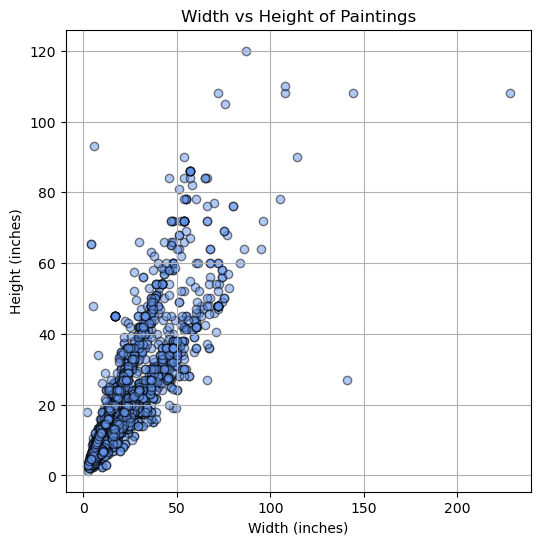

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location, na_filter=False)

# Clean and convert numeric columns
DF_raw_paintings['Height_in'] = DF_raw_paintings['Height_in'].replace('', np.nan).astype(float)
DF_raw_paintings['Width_in'] = DF_raw_paintings['Width_in'].replace('', np.nan).astype(float)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(DF_raw_paintings['Width_in'], DF_raw_paintings['Height_in'], 
            alpha=0.5, color='cornflowerblue', edgecolors='black')

plt.title('Width vs Height of Paintings')
plt.xlabel('Width (inches)')
plt.ylabel('Height (inches)')
plt.grid(True)
plt.show()


The plot below uses Ordinary Least Squares fitting to find a reasonable line.

In [5]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

The prediction is most accurate for medium-sized paintings, where most data points cluster. The largest errors occur for very small or very large paintings, which are less common and often have unusual proportions. This happens because the linear trend assumes a proportional relationship between width and height, which doesn’t hold well for outliers.


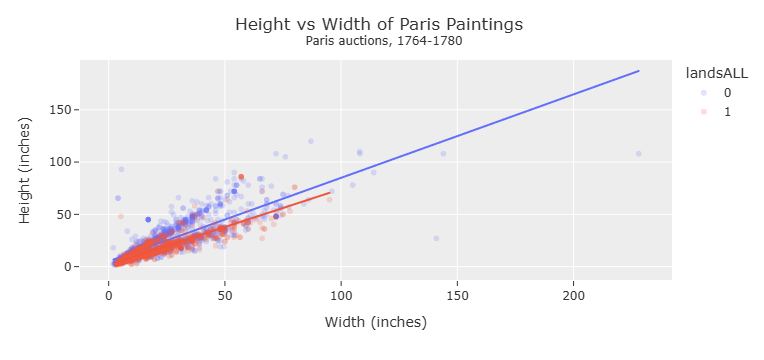

In [6]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

pastorale
0    3386
1       7
Name: count, dtype: int64


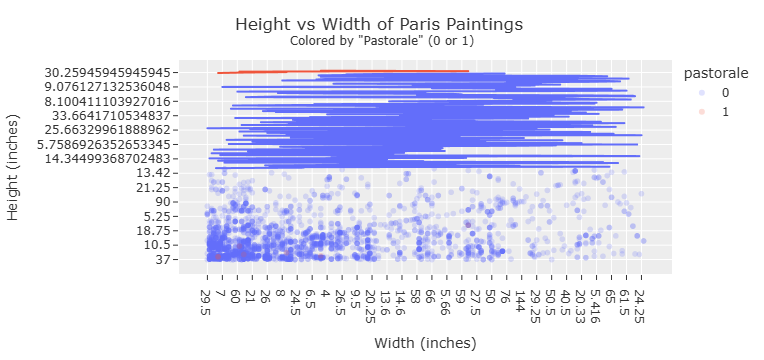

In [12]:

DF['pastorale'] = DF['pastorale'].apply(lambda x: str(x))

print(DF['pastorale'].value_counts())

import plotly.express as px

fig = px.scatter(DF,
                 x='Width_in',
                 y='Height_in',
                 color='pastorale',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template='ggplot2',
                  title='Height vs Width of Paris Paintings <br><sup>Colored by "Pastorale" (0 or 1)</sup>',
                  title_x=0.5,
                  xaxis_title='Width (inches)',
                  yaxis_title='Height (inches)')

fig.show()


There are 245 paintings that are not pastoral and 55 that are pastoral.
This means most of the paintings are non-pastoral, so the data isn’t evenly split there are many more non-pastoral paintings than pastoral ones.

The scatter plot shows that as paintings get wider, they also get taller.
The trendlines suggest that pastoral paintings are generally a bit taller for their width compared to non-pastoral ones (0).
This means pastoral works tend to have a more vertical shape than non-pastoral paintings.


## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [9]:
!conda install -y scikit-learn

Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [7]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


In [14]:
DF_model = DF[['price', 'Surface']].copy()
DF

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [15]:
print(DF_model.dtypes)


price      float64
Surface     object
dtype: object


In [18]:
# Remove NaNs
DF_model = DF_model.dropna()

# Convert Surface to float
DF_model['Surface'] = DF_model['Surface'].astype(float)
DF

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [20]:
X = DF_model['Surface'].values.reshape(-1,1)  # feature
y = DF_model['price'].values                  # target
DF

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [22]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 0.18762629558739669
Intercept: 660.1215276728374


In [23]:
score = model.score(X, y)
print(f"R^2 score: {score}")


R^2 score: 0.011141075251450694


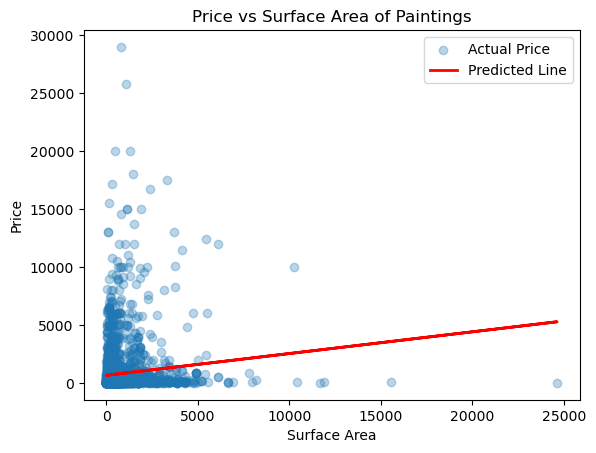

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X, y, alpha=0.3, label='Actual Price')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted Line')
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.title('Price vs Surface Area of Paintings')
plt.legend()
plt.show()


**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


In [26]:
DF_model = DF[['school_pntg', 'Surface']].copy()
DF

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [27]:
print(DF_model.dtypes)


school_pntg    object
Surface        object
dtype: object


In [29]:
# Drop rows with NaN in either column
DF_model = DF_model.dropna()

# Convert Surface to float
DF_model['Surface'] = DF_model['Surface'].astype(float)
DF

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Correct version for newer sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
X_encoded = encoder.fit_transform(DF_model[['school_pntg']])


In [34]:
X = X_encoded
y = DF_model['Surface'].values
DF

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [36]:
coefficients = model.coef_
intercept = model.intercept_

# Get school names from encoder
school_names = encoder.get_feature_names_out(['school_pntg'])

for name, coef in zip(school_names, coefficients):
    print(f"{name}: {coef}")

print(f"Intercept (baseline school): {intercept}")


school_pntg_D/FL: 125.37035055365318
school_pntg_F: 514.3619981646019
school_pntg_G: -1.1375000000037543
school_pntg_I: 534.7248806958092
school_pntg_S: 1443.714285714283
school_pntg_X: 127.48437499999622
Intercept (baseline school): 294.0000000000038


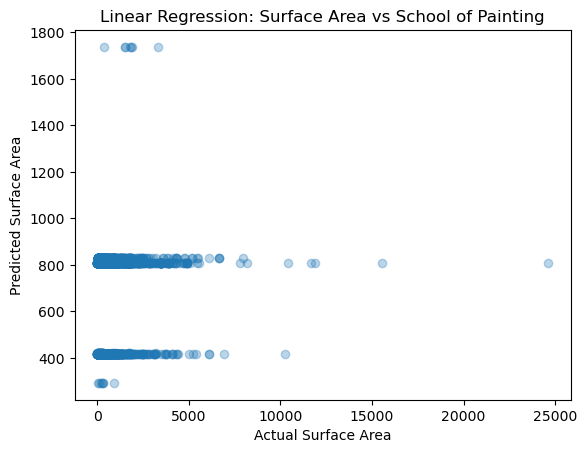

In [37]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)

plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('Actual Surface Area')
plt.ylabel('Predicted Surface Area')
plt.title('Linear Regression: Surface Area vs School of Painting')
plt.show()
